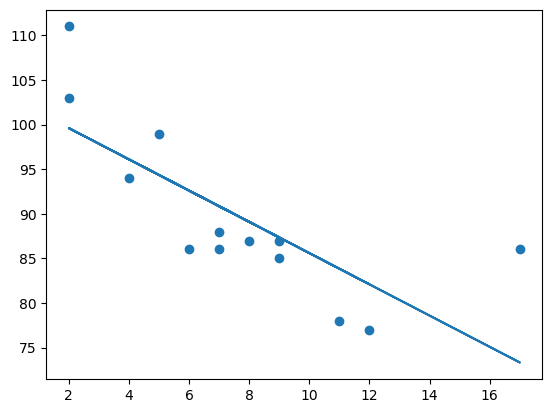

In [22]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

csv = pd.read_csv('Weather_Data.csv')

slope , intercept , r , p , std_err =  stats.linregress(x,y)

def my_func(x):
    return slope * x + intercept

mymodel = list(map( my_func , x ))

plt.scatter( x , y )
plt.plot( x , mymodel )
plt.show()


Coordinates 22.625°E 88.375°N
Elevation 11.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
         date  temperature_2m_max  temperature_2m_min  \
0  2023-12-29           26.650000           16.700001   
1  2023-12-30           26.350000           16.000000   
2  2023-12-31           24.200001           14.600000   
3  2024-01-01           22.950001           13.800000   
4  2024-01-02           21.900000           12.950000   
5  2024-01-03           23.049999           13.100000   
6  2024-01-04           25.350000           14.200000   
7  2024-01-05           25.549999           14.950000   
8  2024-01-06           25.900000           15.600000   
9  2024-01-07           25.650000           16.450001   
10 2024-01-08           24.450001           15.450000   
11 2024-01-09           23.600000           14.850000   
12 2024-01-10           25.200001           14.650000   
13 2024-01-11           24.000000           13.400000   
14 2024-01-12           21.650000         

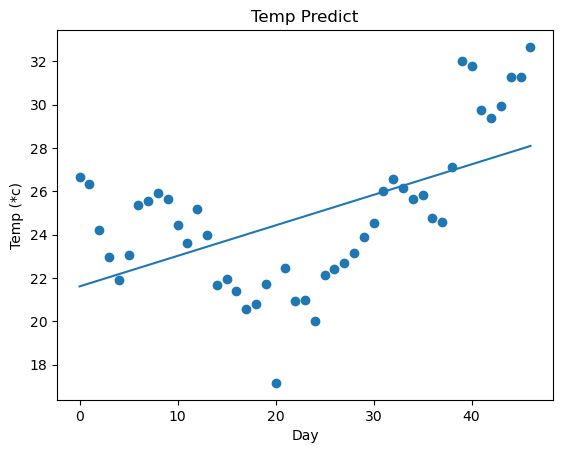

In [34]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import openmeteo_requests
import requests_cache
from retry_requests import retry

cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 22.5626,
	"longitude": 88.363,
	"daily": ["temperature_2m_max", "temperature_2m_min", "apparent_temperature_max"],
	"past_days": 31,
	"forecast_days": 16
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
daily_apparent_temperature_max = daily.Variables(2).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s"),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["apparent_temperature_max"] = daily_apparent_temperature_max

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)
x = range(len(daily_dataframe))
y = daily_dataframe['temperature_2m_max']

slope , intercept , r , p , std_err =  stats.linregress(x,y)

def my_func(x):
    return slope * x + intercept

mymodel = list(map( my_func , x ))

plt.scatter( x , y )
plt.plot( x , mymodel )
plt.xlabel('Day')
plt.ylabel('Temp (*c)')
plt.title('Temp Predict')
plt.show()


In [28]:
pip install requests-cache retry-requests numpy pandas

  Obtaining dependency information for requests-cache from https://files.pythonhosted.org/packages/12/67/9ee2d8d8cca30f2cdc1048a4cd7dac10db2b49ec1eeca31f15a0160b71a0/requests_cache-1.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for retry-requests from https://files.pythonhosted.org/packages/b1/f3/8ce908497bebbc2790ef06240a2c0fb28c096abb59062d88f85090464a5f/retry_requests-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for cattrs>=22.2 from https://files.pythonhosted.org/packages/b3/0d/cd4a4071c7f38385dc5ba91286723b4d1090b87815db48216212c6c6c30e/cattrs-23.2.3-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=21.2 from https://files.pythonhosted.org/packages/e0/44/827b2a91a5816512fcaf3cc4ebc465ccd5d598c45cefa6703fcf4a79018f/attrs-23.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
   --------------------------------- ------ 51.2/60.3 kB 1.3 MB/s eta 0:00:01
   -----------------

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [27]:
pip install openmeteo-requests


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
